# Pro hacking League study

Importing all libraries

In [1152]:
import json
import csv
import urllib.request, json
from pandas.io.json import json_normalize
import pandas as pd
import urllib, json

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn import svm

from sklearn.naive_bayes import GaussianNB
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

Got the data of all teams of all seasons from the below URLs

In [1153]:
urls = ["https://www.prokabaddi.com/sifeeds/kabaddi/static/json/4_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/1_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/2_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/31_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/28_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/3_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/6_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/7_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/29_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/8_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/5_team.json",
       "https://www.prokabaddi.com/sifeeds/kabaddi/static/json/30_team.json"]

In [1154]:
data_stats = pd.DataFrame()
data_h2h = pd.DataFrame()

Hitting the url and then placed data in data_stats. Ignoring head to head data.

In [1155]:
for url in urls:
    response = urllib.request.urlopen(url)

    data = json.loads(response.read())
    bio = json_normalize(data['bio'])
    bio_df = pd.DataFrame.from_dict(json_normalize(data['bio']), orient='columns')
    
    stats_df = pd.DataFrame.from_dict(json_normalize(data['over_all_stats']), orient='columns')
    stats_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']] = bio_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']]
    stats_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']] = bio_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']].loc[0].values
    h2h = stats_df['h2h']
    
    stats_df = stats_df.drop(['h2h'], axis =1)

    h2h_list = h2h.iloc[-1:].iloc[0]
    
    h2h_df = pd.DataFrame(h2h_list)
    h2h_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']] = bio_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']]
    h2h_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']] = bio_df[['captain', 'captain_id','coach', 'coach_id','team_id', 'team_name']].loc[0].values
    if data_stats.empty == True:
        data_stats = stats_df.copy()
        data_h2h = h2h_df.copy()
    else:
        data_stats = data_stats.append(stats_df, ignore_index = True).reset_index(drop = True)
        data_h2h = data_h2h.append(h2h_df,ignore_index = True).reset_index(drop = True)


In [1156]:
data_stats.shape

(80, 72)

In [1157]:
data_stats.head()

,all_out_points,all_outs,captain,captain_id,capture_points,coach,coach_id,defence_touch_points,defending_bonus_points,draws,...,top_defender_value,top_raider,top_raider_id,top_raider_value,total_defending_points,total_raid_points,unsuccesful_tackles,unsuccess_raids,wins,yellow_cards
0,22,11,Maninder Singh,143,,BC Ramesh,812,122,16,1,...,28,Nitin Madane,75,101,122,283,275,146,4,0
1,20,10,Maninder Singh,143,,BC Ramesh,812,136,21,1,...,27,Mahendra Ganesh Rajput,163,55,136,184,190,151,4,0
2,34,17,Maninder Singh,143,,BC Ramesh,812,150,13,0,...,37,Jang Kun Lee,12,79,150,250,192,144,9,0
3,22,11,Maninder Singh,143,,BC Ramesh,812,125,8,2,...,31,Jang Kun Lee,12,61,125,202,201,125,3,0
4,54,27,Maninder Singh,143,,BC Ramesh,812,193,12,6,...,76,Maninder Singh,143,190,193,455,340,223,11,1


In [1158]:
data_stats.columns

Index(['all_out_points', 'all_outs', 'captain', 'captain_id', 'capture_points',
       'coach', 'coach_id', 'defence_touch_points', 'defending_bonus_points',
       'draws', 'empty_raid', 'extra_points', 'green_cards',
       'highest_score.highest_score', 'highest_score.match_date',
       'highest_score.match_id', 'highest_score.team_id',
       'highest_score.team_name', 'highest_score.venue_id',
       'highest_score.venue_name', 'losses', 'matches',
       'max_win_margin.match_date', 'max_win_margin.match_id',
       'max_win_margin.max_win_margin', 'max_win_margin.team1_id',
       'max_win_margin.team1_name', 'max_win_margin.team1_score',
       'max_win_margin.team2_id', 'max_win_margin.team2_name',
       'max_win_margin.team2_score', 'max_win_margin.venue_id',
       'max_win_margin.venue_name', 'name', 'player_team', 'points',
       'raid_bonus_points', 'raid_touch_points', 'raids', 'rank', 'red_cards',
       'score_difference', 'series_id', 'series_name', 'success_raid_p

In [1159]:
data_stats.describe()

,all_out_points,all_outs,captain_id,coach_id,defence_touch_points,defending_bonus_points,draws,empty_raid,extra_points,green_cards,...,top_defender_id,top_defender_value,top_raider_id,top_raider_value,total_defending_points,total_raid_points,unsuccesful_tackles,unsuccess_raids,wins,yellow_cards
count,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,74.450000,37.225000,271.050000,1100.30000,304.825000,27.400000,3.05000,586.100000,52.525000,16.025000,...,389.875000,67.262500,345.412500,196.375000,304.825000,574.950000,450.425000,303.350000,14.27500,1.075000
std,81.760363,40.880182,196.007356,1040.07045,321.893204,30.236452,3.41219,617.883763,56.427163,17.588097,...,526.252054,45.629977,614.166713,172.924391,321.893204,608.622972,475.773555,317.919666,15.94371,1.784426
min,18.000000,9.000000,26.000000,29.00000,100.000000,5.000000,0.00000,174.000000,1.000000,1.000000,...,42.000000,20.000000,12.000000,45.000000,100.000000,184.000000,166.000000,116.000000,1.00000,0.000000
25%,34.000000,17.000000,143.000000,163.25000,155.250000,12.000000,1.00000,301.250000,25.000000,5.000000,...,142.000000,42.000000,58.000000,100.750000,155.250000,268.500000,210.000000,150.250000,6.00000,0.000000
50%,44.000000,22.000000,228.000000,808.00000,191.500000,16.000000,2.00000,353.000000,32.500000,10.000000,...,244.000000,55.500000,124.000000,145.000000,191.500000,350.000000,284.000000,195.500000,9.00000,0.000000
75%,65.000000,32.500000,326.000000,2466.00000,230.500000,25.000000,3.00000,443.500000,49.250000,16.500000,...,358.000000,67.000000,318.000000,214.250000,230.500000,450.500000,343.750000,224.500000,13.25000,1.250000
max,386.000000,193.000000,725.000000,2469.00000,1317.000000,131.000000,15.00000,2444.000000,231.000000,78.000000,...,2670.000000,231.000000,2661.000000,1092.000000,1317.000000,2633.000000,1945.000000,1248.000000,78.00000,11.000000


Lets separate the numeric data from categorical data. Categorical data mostly are names so we will simply drop those columns

In [1160]:
numeric_data = data_stats._get_numeric_data().columns

In [1161]:
categorical_data = list(set(data_stats.columns) - set(numeric_data))

In [1162]:
categorical_data

['team_name',
 'name',
 'captain',
 'highest_score.venue_name',
 'titles.title_details',
 'series_name',
 'max_win_margin.venue_name',
 'capture_points',
 'highest_score.team_name',
 'top_raider',
 'max_win_margin.team1_name',
 'tackle_bonus_points',
 'max_win_margin.team2_name',
 'max_win_margin.match_date',
 'top_defender',
 'coach',
 'highest_score.match_date',
 'top_allrounder',
 'rank']

In [1163]:
data_stats_final_df = data_stats.drop(['max_win_margin.venue_name',
 'titles.title_details',
 'max_win_margin.team2_name',
 'top_defender',
 'top_raider',
 'team_name',
 'coach',
 'highest_score.venue_name',
 'tackle_bonus_points',
 'top_allrounder',
 'highest_score.team_name',
 'series_name',
 'captain',
 'capture_points',
 'highest_score.match_date',
 'name',
 'max_win_margin.team1_name',
 'max_win_margin.match_date'], axis = 1)

## Question 1:- Find the winner

In [1164]:
data_stats_final_df['rank'].value_counts()

-     12
4     12
1      9
2      9
6      9
3      9
5      7
8      5
7      4
9      2
10     1
12     1
Name: rank, dtype: int64

Here we can see that there are 12 rows where there is no rank. These rows are our test rows for which we have to predict the rank and then ultimately the winner. So lets get our test dataframe

In [1165]:
train_df = data_stats_final_df[data_stats_final_df['rank']!='-']
test_df = data_stats_final_df[data_stats_final_df['rank']=='-']

Will be making rank as a numeric columns so that we can predict is easily

In [1166]:
train_df['rank'] = pd.to_numeric(train_df['rank'])

Handling null and missing values

In [1167]:
null_columns=train_df.columns[train_df.isna().any()]
null_columns

Index(['titles.total', 'top_all_rounder_value', 'top_allrounder_id'], dtype='object')

In [1168]:
train_df['titles.total'].value_counts()

Series([], Name: titles.total, dtype: int64)

Dropped titles as they are mostly null

In [1169]:
train_df.drop(['titles.total'],axis=1, inplace=True)
test_df.drop(['titles.total'],axis=1, inplace=True)

Filled the top all rounder id and value with 0

In [1172]:
train_df['top_allrounder_id'] = train_df['top_allrounder_id'].fillna(0.0)
train_df['top_all_rounder_value'] = train_df['top_all_rounder_value'].fillna(0.0)

train_df['top_allrounder_id'] = train_df['top_allrounder_id'].fillna(0.0)
train_df['top_all_rounder_value'] = train_df['top_all_rounder_value'].fillna(0.0)

In [1173]:
train_df.isna().any().sum()

0

In [1174]:
train_df.isna().any().sum()

0

No more null data is present

to map team id later with team name lets separate teamid column first and then reset its index. Also separate rank column

In [1176]:
rank = train_df['rank']
team_id = test_df['team_id'].reset_index(drop=True)

In [1107]:
#train_df.drop(not_to_scale, axis = 1, inplace = True)
#test_df.drop(not_to_scale, axis = 1, inplace = True)

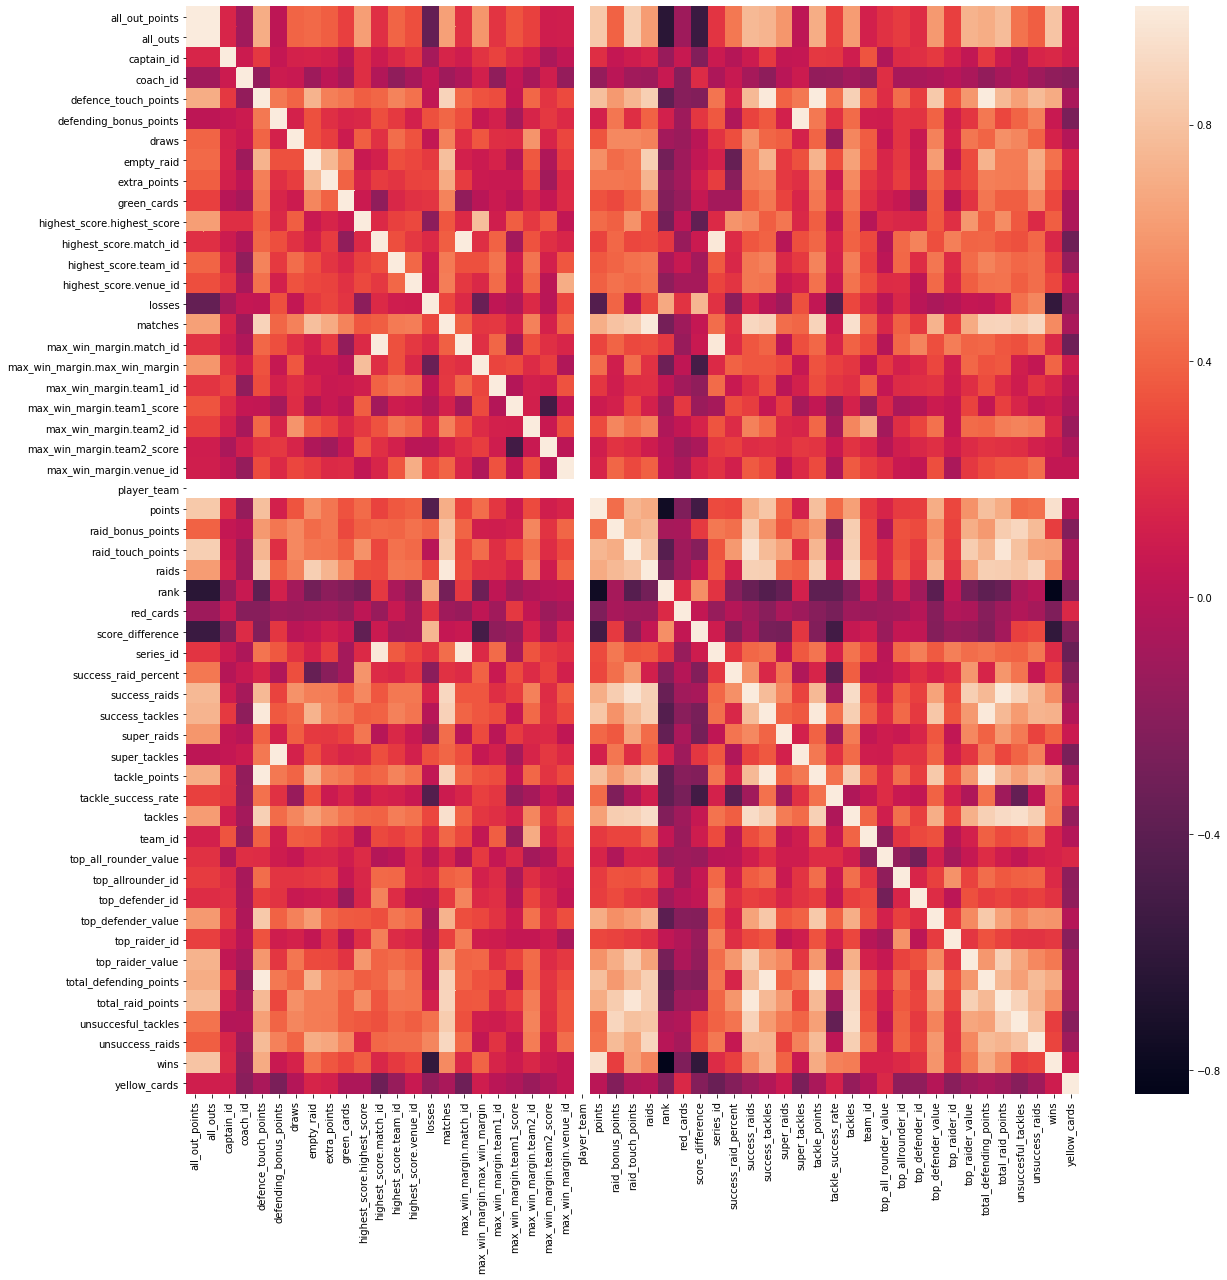

In [1108]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(20,20))      
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [1109]:
Y = rank
X = train_df

In [1110]:
col_list = ['points', 'wins', 'losses']

In [1111]:
'''train_df = train_df[col_list]
test_df = test_df[col_list]

Y = rank
X = train_df'''

'train_df = train_df[col_list]\ntest_df = test_df[col_list]\n\nY = rank\nX = train_df'

In [1112]:
#to_scale = col_list

In [1113]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

In [1114]:
#to_scale = ['points', 'wins', 'all_out_points']

In [1115]:
'''
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])


diff_train = max(y_train) - min(y_train)
mean_train = y_train.mean()
y_train = (abs(y_train - mean_train)) / diff_train



diff_test = max(y_test) - min(y_test)
mean_test = y_test.mean()
y_test = (abs(y_test - mean_test)) / diff_test
'''

'''

'''
diff_train = max(y_train) - min(y_train)
mean_train = y_train.mean()
y_train = (abs(y_train - mean_train)) / diff_train



diff_test = max(y_test) - min(y_test)
mean_test = y_test.mean()
y_test = (abs(y_test - mean_test)) / diff_test



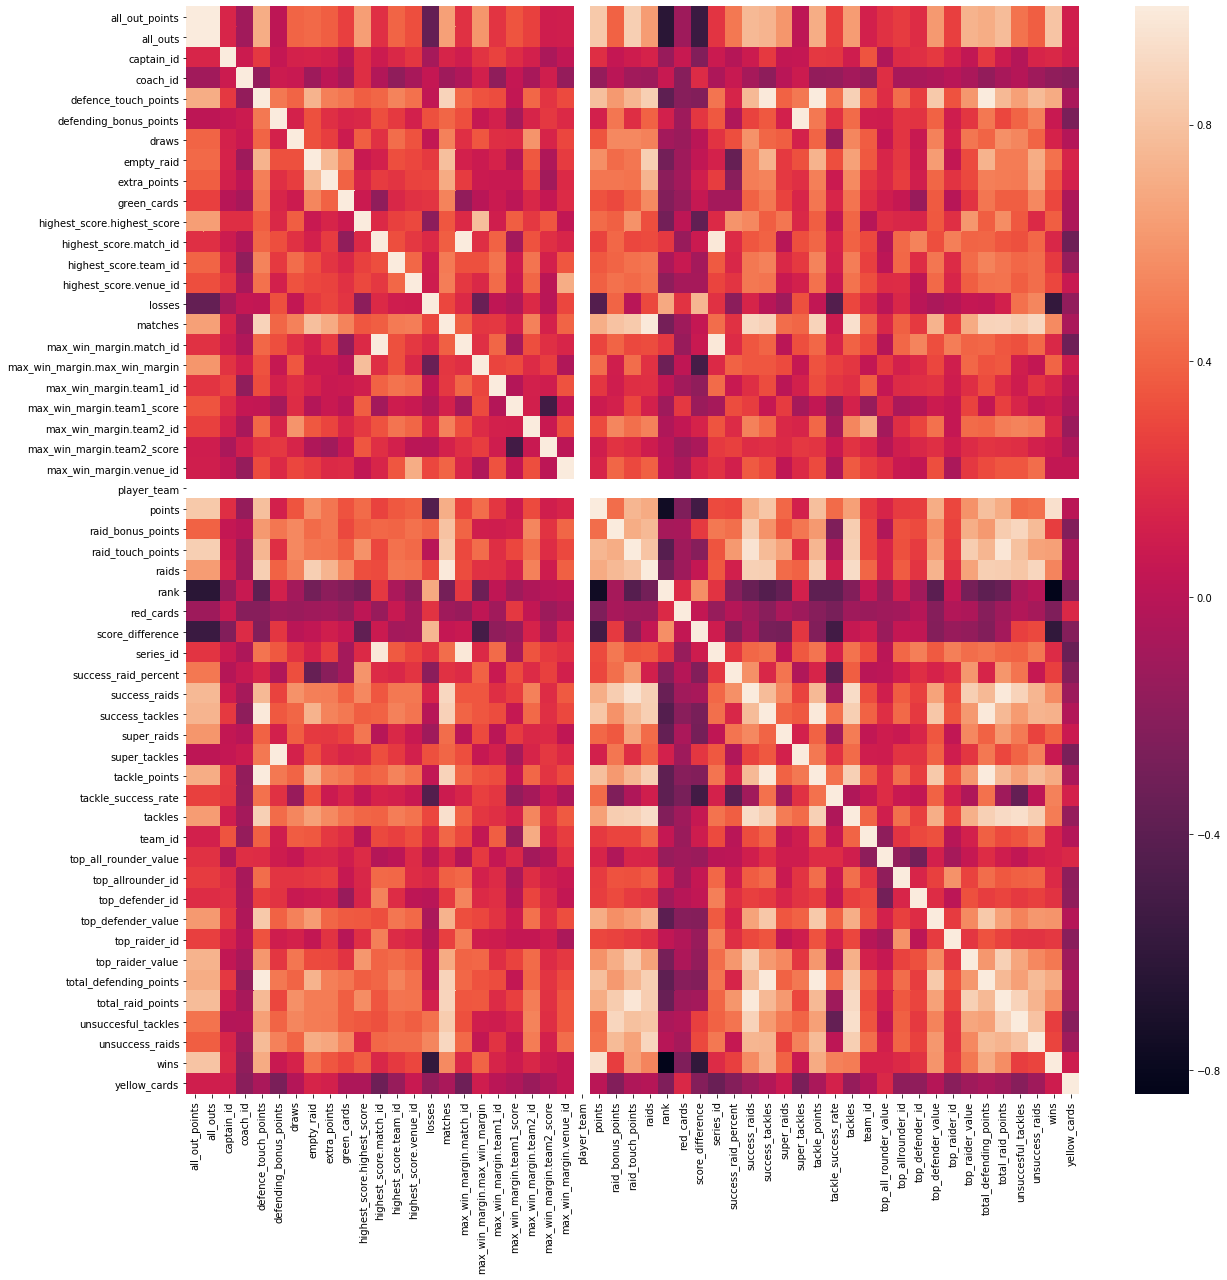

In [1116]:
corr = train_df.corr()
fig, ax = plt.subplots(figsize=(20,20))      
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [1117]:
from sklearn.metrics import mean_squared_error, r2_score

In [1118]:
svm_model = svm.SVR()
svm_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [1119]:
#def get_predicted_outcome(model, data):
#    return np.argmax(model.predict_proba(data), axis=1).astype(np.float32)
#def get_predicted_rank(model, data):
#    return model.predict_proba(data)[:, 1]

len(X_train.columns)

53

In [1120]:
# Making predictions
predictions = svm_model.predict(X_test)

In [1121]:
print("R2 score : %.2f" % r2_score(y_test,predictions))
print("Mean squared error: %.2f" % mean_squared_error(y_test,predictions))


R2 score : -0.08
Mean squared error: 0.02


In [1122]:
# Let's check the report of our default model
#print(classification_report(y_test,predictions))

print(svm_model.score(X_test, y_test))

-0.08390527393109459


## Because the best accuracy score is of SVM so we have taken take that model

In [1123]:
#test_df[to_scale] = scaler.transform(test_df[to_scale])

In [1124]:
test_df[to_scale] = test_df[to_scale]

In [1125]:
#predictions = svm_clf.predict(test_df)
predictions = svm_model.predict(test_df)
min(predictions)

ValueError: could not convert string to float: '-'

In [ ]:
test_df

In [ ]:
#max(rfc.predict_proba(test_df)[:1])

In [ ]:
predictions = pd.Series(predictions).rename('predictions')
#predictions
result = pd.concat([team_id, predictions], axis=1).reset_index(drop=True)
result
result[result['predictions'] == min(result['predictions'])]

In [ ]:
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)
print(model.score(X_test, y_test))
predictions = model.predict(test_df)


In [1126]:
predictions = pd.Series(predictions).rename('predictions')
#predictions
result = pd.concat([team_id, predictions], axis=1).reset_index(drop=True)
result
result[result['predictions'] == max(result['predictions'])]

,team_id,predictions
0,4.0,0.233072
1,1.0,0.233072
2,2.0,0.233072
3,31.0,0.233072
4,28.0,0.233072
5,3.0,0.233072
6,6.0,0.233072
7,7.0,0.233072
8,29.0,0.233072
9,8.0,0.233072


In [1127]:
predictions = pd.Series(predictions).rename('predictions')
result = pd.concat([team_id, predictions], axis=1).reset_index(drop=True)
#max(result['predictions'])
result[result['predictions'] == max(result['predictions'])]

,team_id,predictions
0,4.0,0.233072
1,1.0,0.233072
2,2.0,0.233072
3,31.0,0.233072
4,28.0,0.233072
5,3.0,0.233072
6,6.0,0.233072
7,7.0,0.233072
8,29.0,0.233072
9,8.0,0.233072


In [1128]:
print(accuracy_score(y_test,predictions))

ValueError: continuous is not supported

In [945]:
data_stats[data_stats['team_id'] == 5]['team_name'].iloc[0]

'U Mumba'

# Winner is 'Patna Pirates'

# Calculate top team in total points

In [51]:
Y = train_df['points']
X = train_df.drop(['points'], axis = 1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
not_to_scale = ['captain_id', 'coach_id', 'highest_score.team_id', 'player_team', 'series_id', 'top_allrounder_id','top_defender_id', 'team_id', 'top_raider_id', 'rank', 'points']
to_scale = [item for item in list(train_df.columns) if item not in not_to_scale]
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [53]:
model1=sm.OLS(y_train,X_train)

In [54]:
result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 points   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              90.85
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                    0.000250
Time:                        12:01:53   Log-Likelihood:                         -93.439
No. Observations:                  47   AIC:                                      272.9
Df Residuals:                       4   BIC:                                      352.4
Df Model:                          43                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [55]:
model = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)

In [56]:
reg.score(X_test, y_test)

0.827963921018922

This seems like linear model gives a very good score

In [57]:
predicted_points = reg.predict(X_test)

In [58]:
predicted_points = pd.Series(predicted_points).rename('predicted_points')
result = pd.concat([team_id, predicted_points], axis=1).reset_index(drop=True)
result.sort_values(by=['predicted_points'], ascending=False)

,team_id,predicted_points
5,3.0,79.960392
10,5.0,66.596902
9,8.0,65.449058
14,NaN,59.766602
2,2.0,58.654284
13,NaN,55.869676
17,NaN,54.036886
3,31.0,51.211457
0,4.0,48.709330
7,7.0,48.552633


In [59]:
data_stats[data_stats['team_id'] == 31]['team_name'].iloc[0]

'Gujarat Fortunegiants'

# Team with max total points is Gujarat Fortunegiants

# Question 3:- team with the highest points for successful raids

In [60]:
Y = train_df['success_raids']
X = train_df.drop(['success_raids'], axis = 1)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
not_to_scale = ['captain_id', 'coach_id', 'highest_score.team_id', 'player_team', 'series_id', 'top_allrounder_id','top_defender_id', 'team_id', 'top_raider_id', 'rank', 'success_raids']
to_scale = [item for item in list(train_df.columns) if item not in not_to_scale]
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [62]:
model1=sm.OLS(y_train,X_train)

In [63]:
result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:          success_raids   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              64.38
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                     0.00268
Time:                        12:01:56   Log-Likelihood:                         -172.10
No. Observations:                  47   AIC:                                      432.2
Df Residuals:                       3   BIC:                                      513.6
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [64]:
model = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)

In [65]:
reg.score(X_test, y_test)

1.0

In [66]:
predicted_success_raids = reg.predict(X_test)
predicted_success_raids = pd.Series(predicted_success_raids).rename('predicted_success_raids')
result = pd.concat([team_id, predicted_success_raids], axis=1).reset_index(drop=True)
result.sort_values(by=['predicted_success_raids'], ascending=False)

,team_id,predicted_success_raids
18,NaN,406.0
11,30.0,361.0
9,8.0,357.0
5,3.0,335.0
17,NaN,334.0
1,1.0,309.0
2,2.0,290.0
0,4.0,289.0
4,28.0,275.0
10,5.0,270.0


In [67]:
data_stats[data_stats['team_id'] == 6]['team_name'].iloc[0]

'Patna Pirates'

# Team with max total points is Patna Pirates

# Question 4:- team with the highest points for successful tackles

In [68]:
Y = train_df['success_tackles']
X = train_df.drop(['success_tackles'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
not_to_scale = ['captain_id', 'coach_id', 'highest_score.team_id', 'player_team', 'series_id', 'top_allrounder_id','top_defender_id', 'team_id', 'top_raider_id', 'rank', 'success_tackles']
to_scale = [item for item in list(train_df.columns) if item not in not_to_scale]
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [69]:
model1=sm.OLS(y_train,X_train)

In [70]:
result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:        success_tackles   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              63.73
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                     0.00272
Time:                        12:01:58   Log-Likelihood:                         -147.82
No. Observations:                  47   AIC:                                      383.6
Df Residuals:                       3   BIC:                                      465.1
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [71]:
model = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

1.0

In [72]:
predicted_success_tackles = reg.predict(X_test)
predicted_success_tackles = pd.Series(predicted_success_tackles).rename('predicted_success_tackles')
result = pd.concat([team_id, predicted_success_tackles], axis=1).reset_index(drop=True)
result.sort_values(by=['predicted_success_tackles'], ascending=False)

,team_id,predicted_success_tackles
5,3.0,242.0
9,8.0,240.0
17,NaN,202.0
0,4.0,202.0
18,NaN,186.0
2,2.0,181.0
11,30.0,180.0
13,NaN,177.0
1,1.0,168.0
4,28.0,160.0


In [73]:
data_stats[data_stats['team_id'] == 31]['team_name'].iloc[0]

'Gujarat Fortunegiants'

# Team with most successful tackles is Gujarat Fortunegiants

# Question 5: team with the highest super-performance total

In [74]:
Y = train_df['wins']
X = train_df.drop(['wins'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
not_to_scale = ['captain_id', 'coach_id', 'highest_score.team_id', 'player_team', 'series_id', 'top_allrounder_id','top_defender_id', 'team_id', 'top_raider_id', 'rank', 'wins']
to_scale = [item for item in list(train_df.columns) if item not in not_to_scale]
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [75]:
model1=sm.OLS(y_train,X_train)

In [76]:
result=model1.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                   wins   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              70.99
Date:                Wed, 02 Oct 2019   Prob (F-statistic):                     0.00232
Time:                        12:02:01   Log-Likelihood:                         -9.6382
No. Observations:                  47   AIC:                                      107.3
Df Residuals:                       3   BIC:                                      188.7
Df Model:                          44                                                  
Covariance Type:            nonrobust                                                  
                                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------

In [77]:
model = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

1.0

In [78]:
predicted_wins = reg.predict(X_test)
predicted_wins = pd.Series(predicted_wins).rename('predicted_wins')
result = pd.concat([team_id, predicted_wins], axis=1).reset_index(drop=True)
result.sort_values(by=['predicted_wins'], ascending=False)

,team_id,predicted_wins
5,3.0,16.0
10,5.0,12.0
2,2.0,12.0
14,NaN,12.0
1,1.0,10.0
9,8.0,10.0
13,NaN,10.0
18,NaN,9.0
7,7.0,9.0
3,31.0,9.0


In [79]:
data_stats[data_stats['team_id'] == 31]['team_name'].iloc[0]

'Gujarat Fortunegiants'

# Team with best performance is Gujarat Fortunegiants

# Question 6:-  Predict the player with the highest SUCCESSFUL RAID percentage

In [80]:
Y = train_df['top_raider_id']
X = train_df.drop(['top_raider_id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)
not_to_scale = ['captain_id', 'coach_id', 'highest_score.team_id', 'player_team', 'series_id', 'top_allrounder_id','top_defender_id', 'team_id', 'top_raider_id', 'rank']
to_scale = [item for item in list(train_df.columns) if item not in not_to_scale]
scaler = StandardScaler()
X_train[to_scale] = scaler.fit_transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

In [81]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
predicted_top_raider_id = logreg.predict(X_test)

In [82]:
print(accuracy_score(y_test,predicted_top_raider_id))

0.19047619047619047


In [83]:
predicted_top_raider_id = pd.Series(predicted_top_raider_id).rename('predicted_top_raider_id')
result = pd.concat([team_id, predicted_top_raider_id], axis=1).reset_index(drop=True)
result.sort_values(by=['predicted_top_raider_id'], ascending=False)

,team_id,predicted_top_raider_id
0,4.0,2026
5,3.0,757
9,8.0,320
19,NaN,318
18,NaN,197
11,30.0,143
13,NaN,143
16,NaN,92
15,NaN,92
14,NaN,92
